In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, KFold

In [12]:
os.listdir()

['.config',
 'CenterSensor',
 'Protocols',
 'OU-IneritialGaitData.zip',
 'RightSensor',
 'OU-IneritialGaitActionDataset.zip',
 'adc.json',
 'LeftSensor',
 'AutomaticExtractionData_IMUZCenter',
 'PaperProtocol',
 'IDGenderAgelist_ig.csv',
 'ManualExtractionData',
 'sample_data']

In [0]:
def file_name(file_dir): 
    dic={}
    for root, dirs, files in os.walk(file_dir):
        dic[root]=files
#         print(root) #path
#         print(dirs) #subdirectory
#         print(files) #files in non-subdirectory
    return dic

In [0]:
AutomaticExtractionData=file_name("./AutomaticExtractionData_IMUZCenter")
ManualExtractionData=file_name("./ManualExtractionData")
ManualExtractionData_name= list(ManualExtractionData.keys())[1:]
SimilarAction_left = file_name("./LeftSensor")
SimilarAction_right = file_name("./RightSensor")
SimilarAction_center = file_name("./CenterSensor")
label=pd.read_csv('./IDGenderAgelist_ig.csv',dtype='object')

In [0]:
def change_ID_number(x):
    if len(x)==3:
        return ('000' + x)
    elif len(x)==4:
        return ('00' + x)
    elif len(x)==5:
        return ('0' + x)
    else:
        return x
      
label['adjusted_ID']=label['ID'].apply(lambda x: change_ID_number(x))
def file_name_with_ID(x,post,ls):
    for i in range(len(list(ls))):
        if (x == ls[i][5:11] and ls[i][12:]== post):
            return(ls[i])

In [0]:
label['AutomaticExtractionData_IMUZCenter_Walk_1']=label['adjusted_ID'].apply(lambda x: 
                                file_name_with_ID(x,'Center_seq0.csv',list(AutomaticExtractionData.values())[0]))
label['AutomaticExtractionData_IMUZCenter_Walk_2']=label['adjusted_ID'].apply(lambda x: 
                                file_name_with_ID(x,'Center_seq1.csv',list(AutomaticExtractionData.values())[0]))
label['ManualExtractionData/IMUZCenter_Walk_1']=label['adjusted_ID'].apply(lambda x: 
                                file_name_with_ID(x,'Walk1.csv',ManualExtractionData[ManualExtractionData_name[0]]))
label['ManualExtractionData/IMUZCenter_Walk_2']=label['adjusted_ID'].apply(lambda x: 
                                file_name_with_ID(x,'Walk2.csv',ManualExtractionData[ManualExtractionData_name[0]]))
label['ManualExtractionData/IMUZCenter_SlopeDown']=label['adjusted_ID'].apply(lambda x: 
                                file_name_with_ID(x,'SlopeDown.csv',ManualExtractionData[ManualExtractionData_name[0]]))
label['ManualExtractionData/IMUZCenter_SlopeUp']=label['adjusted_ID'].apply(lambda x: 
                                file_name_with_ID(x,'SlopeUp.csv',ManualExtractionData[ManualExtractionData_name[0]]))
label['ManualExtractionData/IMUZRight_Walk_1']=label['adjusted_ID'].apply(lambda x: 
                                file_name_with_ID(x,'Walk1.csv',ManualExtractionData[ManualExtractionData_name[1]]))
label['ManualExtractionData/IMUZRight_Walk_2']=label['adjusted_ID'].apply(lambda x: 
                                file_name_with_ID(x,'Walk2.csv',ManualExtractionData[ManualExtractionData_name[1]]))
label['ManualExtractionData/IMUZRight_SlopeDown']=label['adjusted_ID'].apply(lambda x: 
                                file_name_with_ID(x,'SlopeDown.csv',ManualExtractionData[ManualExtractionData_name[1]]))
label['ManualExtractionData/IMUZRight_SlopeUp']=label['adjusted_ID'].apply(lambda x: 
                                file_name_with_ID(x,'SlopeUp.csv',ManualExtractionData[ManualExtractionData_name[1]]))
label['ManualExtractionData/IMUZLeft_Walk_1']=label['adjusted_ID'].apply(lambda x: 
                                file_name_with_ID(x,'Walk1.csv',ManualExtractionData[ManualExtractionData_name[2]]))
label['ManualExtractionData/IMUZLeft_Walk_2']=label['adjusted_ID'].apply(lambda x: 
                                file_name_with_ID(x,'Walk2.csv',ManualExtractionData[ManualExtractionData_name[2]]))
label['ManualExtractionData/IMUZLeft_SlopeDown']=label['adjusted_ID'].apply(lambda x: 
                                file_name_with_ID(x,'SlopeDown.csv',ManualExtractionData[ManualExtractionData_name[2]]))
label['ManualExtractionData/IMUZLeft_SlopeUp']=label['adjusted_ID'].apply(lambda x: 
                                file_name_with_ID(x,'SlopeUp.csv',ManualExtractionData[ManualExtractionData_name[2]]))
label['ManualExtractionData/Android_Walk_1']=label['adjusted_ID'].apply(lambda x: 
                                file_name_with_ID(x,'Walk1.csv',ManualExtractionData[ManualExtractionData_name[3]]))
label['ManualExtractionData/Android_Walk_2']=label['adjusted_ID'].apply(lambda x: 
                                file_name_with_ID(x,'Walk2.csv',ManualExtractionData[ManualExtractionData_name[3]]))
label['ManualExtractionData/Android_SlopeDown']=label['adjusted_ID'].apply(lambda x: 
                                file_name_with_ID(x,'SlopeDown.csv',ManualExtractionData[ManualExtractionData_name[3]]))
label['ManualExtractionDataAndroid_SlopeUp']=label['adjusted_ID'].apply(lambda x: 
                                file_name_with_ID(x,'SlopeUp.csv',ManualExtractionData[ManualExtractionData_name[3]]))
label['SimilarActionLeftSensor']=label['adjusted_ID'].apply(lambda x: 
                                file_name_with_ID(x,'actLabel',list(SimilarAction_left.values())[0]))
label['SimilarActionRightSensor']=label['adjusted_ID'].apply(lambda x: 
                                file_name_with_ID(x,'actLabel',list(SimilarAction_right.values())[0]))
label['SimilarActionCenterSensor']=label['adjusted_ID'].apply(lambda x: 
                                file_name_with_ID(x,'actLabel',list(SimilarAction_center.values())[0]))

In [38]:
label.head()

,ID,Gender(0:Female;1:Male),Age,adjusted_ID,AutomaticExtractionData_IMUZCenter_Walk_1,AutomaticExtractionData_IMUZCenter_Walk_2,ManualExtractionData/IMUZCenter_Walk_1,ManualExtractionData/IMUZCenter_Walk_2,ManualExtractionData/IMUZCenter_SlopeDown,ManualExtractionData/IMUZCenter_SlopeUp,...,ManualExtractionData/IMUZLeft_Walk_2,ManualExtractionData/IMUZLeft_SlopeDown,ManualExtractionData/IMUZLeft_SlopeUp,ManualExtractionData/Android_Walk_1,ManualExtractionData/Android_Walk_2,ManualExtractionData/Android_SlopeDown,ManualExtractionDataAndroid_SlopeUp,SimilarActionLeftSensor,SimilarActionRightSensor,SimilarActionCenterSensor
0,000104,1,33,000104,T0_ID000104_Center_seq0.csv,T0_ID000104_Center_seq1.csv,T0_ID000104_Walk1.csv,T0_ID000104_Walk2.csv,T0_ID000104_SlopeDown.csv,T0_ID000104_SlopeUp.csv,...,T0_ID000104_Walk2.csv,T0_ID000104_SlopeDown.csv,T0_ID000104_SlopeUp.csv,T0_ID000104_Walk1.csv,T0_ID000104_Walk2.csv,T0_ID000104_SlopeDown.csv,T0_ID000104_SlopeUp.csv,T0_Id000104.actLabel,T0_Id000104.actLabel,T0_Id000104.actLabel
1,002318,0,11,002318,T0_ID002318_Center_seq0.csv,T0_ID002318_Center_seq1.csv,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,002422,1,9,002422,T0_ID002422_Center_seq0.csv,T0_ID002422_Center_seq1.csv,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,002526,0,45,002526,T0_ID002526_Center_seq0.csv,T0_ID002526_Center_seq1.csv,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,002630,0,37,002630,T0_ID002630_Center_seq0.csv,T0_ID002630_Center_seq1.csv,T0_ID002630_Walk1.csv,T0_ID002630_Walk2.csv,T0_ID002630_SlopeDown.csv,T0_ID002630_SlopeUp.csv,...,T0_ID002630_Walk2.csv,T0_ID002630_SlopeDown.csv,T0_ID002630_SlopeUp.csv,T0_ID002630_Walk1.csv,T0_ID002630_Walk2.csv,T0_ID002630_SlopeDown.csv,T0_ID002630_SlopeUp.csv,T0_Id002630.actLabel,T0_Id002630.actLabel,T0_Id002630.actLabel


In [0]:
def generate_read_table(fileName,actionName,ID,label): 
  #try:
    dataset_name= fileName + actionName
    path_name= fileName +'/'+ str(label[label['ID']==ID][dataset_name].values[0])
    if fileName=='ManualExtractionData/Android':
      df=pd.read_csv(path_name,skiprows=2)
      df.columns=[0,0,0,df.columns.values[3],df.columns.values[4],df.columns.values[5]]
      insert_line=pd.DataFrame(df.columns.values).T
      df.columns=insert_line.columns
      df=pd.concat([insert_line,df],axis=0)
    elif fileName == "SimilarAction":
      df=pd.read_table(actionName + "/" + str(label[label['ID']==ID][dataset_name].values[0]) ,skiprows=1)
      return df
      df.columns=[0,0,0,df.columns.values[3],df.columns.values[4],df.columns.values[5]]
      insert_line=pd.DataFrame(df.columns.values).T
      df.columns=insert_line.columns
      df=pd.concat([insert_line,df],axis=0)
    else:
      df=pd.read_csv(path_name,skiprows=2)
      insert_line=pd.DataFrame(df.columns.values).T
      df.columns=insert_line.columns
      df=pd.concat([insert_line,df],axis=0)
    df.columns=['Gx','Gy','Gz','Ax','Ay','Az']
    df = df.astype(float)
    return df
  #except:
    #return None
df = generate_read_table( 'AutomaticExtractionData_IMUZCenter','_Walk_1','002318',label)

In [40]:
df.head()

,Gx,Gy,Gz,Ax,Ay,Az
0,0.236353,-0.627744,0.041949,-0.024,-0.826,0.150
0,0.177763,-0.622424,-0.053925,0.006,-0.834,0.148
1,0.044605,-0.638404,-0.181756,0.028,-0.824,0.148
2,-0.045942,-0.670364,-0.309588,0.040,-0.822,0.084
3,-0.056595,-0.643724,-0.384157,0.060,-0.844,0.026


In [41]:
os.listdir()

['.config',
 'CenterSensor',
 'Protocols',
 'OU-IneritialGaitData.zip',
 'RightSensor',
 'OU-IneritialGaitActionDataset.zip',
 'adc.json',
 'LeftSensor',
 'AutomaticExtractionData_IMUZCenter',
 'PaperProtocol',
 'IDGenderAgelist_ig.csv',
 'ManualExtractionData',
 'sample_data']

In [0]:
df = generate_read_table('SimilarAction','LeftSensor','000104',label)

In [44]:
df.head()

,Gx,Gy,Gz,Ax,Ay,Az,Label
0,-0.024172,-0.454651,0.173332,0.052,-0.770,-0.138,0
1,-0.018845,-0.433345,0.168006,0.072,-0.766,-0.142,0
2,0.018439,-0.428019,0.157353,0.110,-0.758,-0.138,0
3,0.002460,-0.348124,0.104090,0.130,-0.760,-0.134,0
4,0.055723,-0.273556,0.072132,0.150,-0.780,-0.122,0


In [0]:
import random
import math

def yipeng_preprocessing(raw_data, length):
            
  # Data augmentation
  if raw_data.shape[0] > length:
    #data = raw_data[0:length] # Cut the data
    start_index = random.randrange(len(raw_data) - (length))
    data = raw_data[start_index: start_index + length]
  else:
    period = math.ceil(length / raw_data.shape[0])
    temp = np.copy(raw_data)
    # copy the data periodic
    for i in range(period-1):
      temp = np.row_stack((temp, raw_data))
      data = (temp[0:length]) # Cut the data
            
  return data

In [0]:
import copy

df = pd.read_csv('./IDGenderAgelist_ig.csv')
ids = df["ID"].values
gender = df["Gender(0:Female;1:Male)"].values
age = copy.deepcopy(df["Age"].values)
act_age = df["Age"].values

In [47]:
from keras.utils.np_utils import to_categorical
#for i in range(0,40):
#    age[(age > (i * 2.5)) & (age <= ((i + 1) * 2.5))] = i
#for i in range(0,20):
#    age[(age > (i * 5.0)) & (age <= ((i + 1) * 5.0))] = i
for i in range(0,10):
    age[(age > (i * 10.0)) & (age <= ((i + 1) * 10.0))] = i

Using TensorFlow backend.


(array([214., 150.,  94., 117., 127.,  32.,  19.,  10.]),
 array([0.   , 0.875, 1.75 , 2.625, 3.5  , 4.375, 5.25 , 6.125, 7.   ]),
 <a list of 8 Patch objects>)

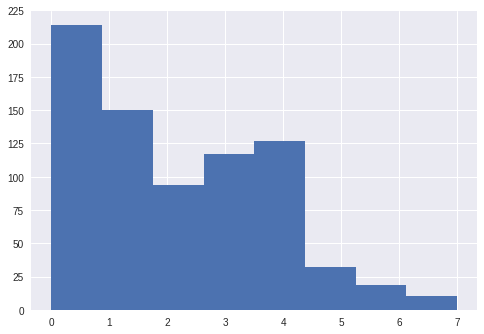

In [48]:
#plt.hist(age,bins = 32)
#plt.hist(age,bins = 16)
plt.hist(age,bins = 8)

In [49]:
to_categorical(age).shape

(763, 8)

In [50]:
df.head()

,ID,Gender(0:Female;1:Male),Age
0,104,1,33
1,2318,0,11
2,2422,1,9
3,2526,0,45
4,2630,0,37


In [1]:
from keras.models import Sequential, Model
from keras.layers import Input, LSTM, Bidirectional, Dropout, Flatten, Dense, TimeDistributed, GlobalMaxPooling1D, Conv2D, Reshape, Activation, Add, BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import Conv1D, UpSampling1D
from keras.layers.pooling import MaxPooling1D
from keras.losses import categorical_crossentropy, binary_crossentropy, mae
from keras.layers.merge import concatenate
from keras.optimizers import SGD

#Deep Convoluional LSTM model

def get_model(n_timesteps):
    
  inputs_acel = Input(shape=(n_timesteps,3,))
  x1 = Conv1D(256, 11, padding='same', activation='relu')(inputs_acel)
  x1 = BatchNormalization()(x1)
  x1 = MaxPooling1D(2, padding='same')(x1)
  
  inputs_gylo = Input(shape=(n_timesteps,3,))
  x2 = Conv1D(256, 11, padding='same', activation='relu')(inputs_gylo)
  x2 = BatchNormalization()(x2)
  x2 = MaxPooling1D(2, padding='same')(x2)

  x = concatenate([x1, x2])

  x = Conv1D(256, 11, padding='same', activation='relu')(x)
  x = BatchNormalization()(x)
  x = MaxPooling1D(2, padding='same')(x)
  x = Conv1D(128, 11, padding='same', activation='relu')(x)
  x = BatchNormalization()(x)
  x = Conv1D(64, 11, padding='same', activation='relu')(x)
  x = BatchNormalization()(x)
  x = Bidirectional(LSTM(100,return_sequences=True))(x)
  x = Bidirectional(LSTM(100))(x)
  x = Dropout(0.5)(x)
  
  x_gender = Dense(100, activation='relu')(x)
  gender = Dense(1, activation='sigmoid',name='gender')(x_gender)
  
  x_age = Dense(100, activation='relu')(x)
  age = Dense(8, activation='softmax',name='age')(x_age)
    
  inputs = [inputs_acel, inputs_gylo]
  outputs = [gender, age]
  
  model = Model(inputs=inputs, outputs = outputs)
  sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

  model.compile(loss={'gender': binary_crossentropy, 'age': categorical_crossentropy},
                  loss_weights={'gender': 0.50, 'age': 0.50},
                optimizer= "adam", metrics=['accuracy'])
  return model 

/home/takuya/anaconda3/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


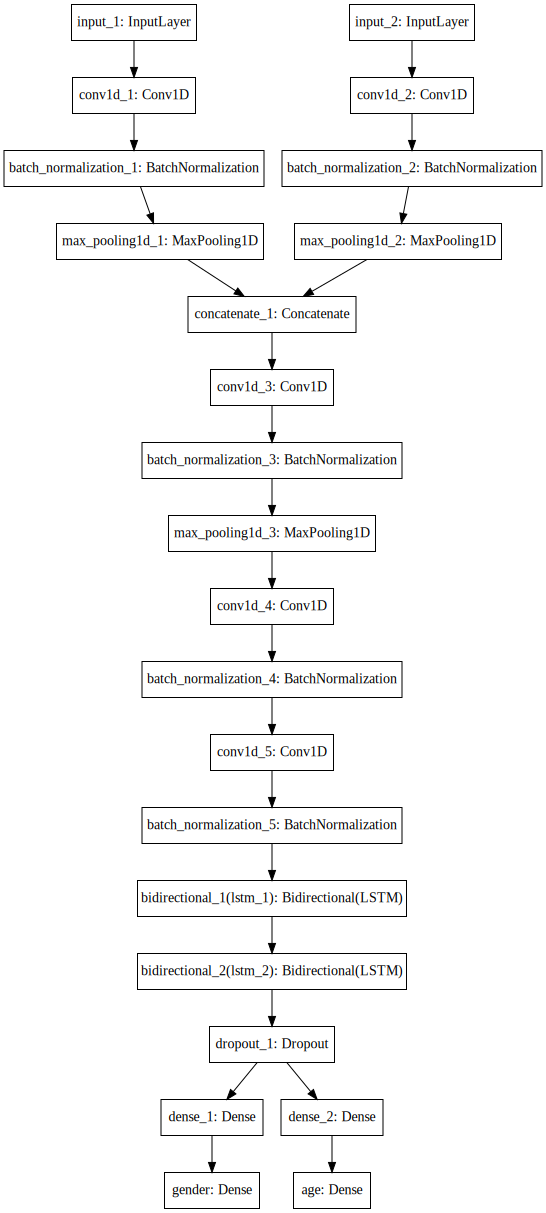

In [2]:
from keras.utils.vis_utils import model_to_dot 
from IPython.display import SVG

model = get_model(1000)
SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [53]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 1000, 3)      0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 1000, 3)      0                                            
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 1000, 256)    8704        input_1[0][0]                    
__________________________________________________________________________________________________
conv1d_2 (Conv1D)               (None, 1000, 256)    8704        input_2[0][0]                    
__________________________________________________________________________________________________
batch_norm

In [0]:
def get_max(y_pred):
    for i in range(len(y_pred)):
        temp = y_pred[i]
        temp[np.argmax(temp)] = 1
        temp[temp != 1] = 0
        y_pred[i] = temp
    return y_pred

In [56]:
from tqdm import tqdm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from keras import backend as K
from sklearn.preprocessing import StandardScaler
import gc

ls_acc = []
ls_mae = []
ls_mae_2 = []

length = 100
overlap = 50

datasets = label.columns[4:]
file_name=['AutomaticExtractionData_IMUZCenter','ManualExtractionData/IMUZCenter','ManualExtractionData/IMUZRight',
          'ManualExtractionData/IMUZLeft','ManualExtractionData/Android']
action_name=['_Walk_1','_Walk_2','_SlopeDown','_SlopeUp']
sensor_loc = ["CenterSensor", "RightSensor", "LeftSensor"]
skf = StratifiedKFold(n_splits = 5)

for train_index, test_index in skf.split(ids, gender):
    print("TRAIN:", len(train_index), "TEST:", len(test_index))
    ids_train, ids_test = ids[train_index], ids[test_index]
    gender_train, gender_test = gender[train_index], gender[test_index]
    age_dummy = to_categorical(age)
    age_train, age_test = age_dummy[train_index], age_dummy[test_index]
    _, act_age_test = act_age[train_index], act_age[test_index]
    ids_train, ids_valid, gender_train, gender_valid, age_train, age_valid  = train_test_split(ids_train, gender_train, age_train,  test_size=0.10, random_state=42)
    
    x_train = []
    new_y_train = []
    new_gender_train = []
    new_age_train = []
    for i in tqdm(range(0,len(ids_train))):
        subject_id = change_ID_number(str(ids_train[i]))
        for k in range(0,len(file_name) - 1):
            for l in range(0,len(action_name)):
                try:
                    df_subject = generate_read_table(file_name[k], action_name[l],subject_id,label)
                    sc = StandardScaler()
                    df_subject = pd.DataFrame(sc.fit_transform(df_subject))
                    start_index = 0
                    if(start_index + length < len(df_subject)):
                        while(start_index + length < len(df_subject)):
                            temp_x = df_subject.values[start_index:start_index + length]
                            x_train.append(temp_x)
                            new_gender_train.append(gender_train[i])
                            new_age_train.append(age_train[i])
                            start_index += (length - overlap)
                    else:
                        df_subject = generate_read_table(path_name,file_name[k], action_name[l],subject_id,label)
                        sc = StandardScaler()
                        df_subject = pd.DataFrame(sc.fit_transform(df_subject))
                        temp_x = yipeng_preprocessing(df_subject.values, length)
                        x_train.append(temp_x)
                        new_gender_train.append(gender_train[i])
                        new_age_train.append(age_train[i])
                except: 
                    continue
                
        for k in range(0,3):
            try:
                df_subject = generate_read_table('SimilarAction',sensor_loc[k],subject_id,label)
                del df_subject["Label"]
                sc = StandardScaler()
                df_subject = pd.DataFrame(sc.fit_transform(df_subject))
                start_index = 0
                while(start_index + length < len(df_subject)):
                    temp_x = df_subject.values[start_index :start_index  + length]
                    x_train.append(temp_x)
                    new_gender_train.append(gender_train[i])
                    new_age_train.append(age_train[i])
                    start_index += (length - overlap)
            except: 
                continue
            
    x_valid = []
    new_gender_valid = []
    new_age_valid = []
    
    for i in tqdm(range(0,len(ids_valid))):
        subject_id = change_ID_number(str(ids_valid[i]))
        for k in range(0,3):
            try:
                df_subject = generate_read_table('SimilarAction',sensor_loc[k],subject_id,label)
                del df_subject["Label"]
                sc = StandardScaler()
                df_subject = pd.DataFrame(sc.fit_transform(df_subject))
                start_index = 0
                while(start_index + length < len(df_subject)):
                    temp_x = df_subject.values[start_index:start_index + length]
                    x_valid.append(temp_x)
                    new_gender_valid.append(gender_valid[i])
                    new_age_valid.append(age_valid[i])
                    start_index += (length - overlap)
            except:
                continue
           
    x_test = []
    new_gender_test = []
    new_age_test= []
    new_act_age_test = []
    ls_count = []
    
    for i in tqdm(range(0,len(ids_test))):
        subject_id = change_ID_number(str(ids_test[i]))
        for k in range(0,3):
            try:
                df_subject = generate_read_table('SimilarAction',sensor_loc[k],subject_id,label)
                del df_subject["Label"]
                sc = StandardScaler()
                df_subject = pd.DataFrame(sc.fit_transform(df_subject))
                start_index = 0
                c = 0
                while(start_index + length < len(df_subject)):
                    temp_x = df_subject.values[start_index:start_index + length]
                    x_test.append(temp_x)                    
                    start_index += (length - overlap)
                    c += 1
                ls_count.append(c)
                new_gender_test.append(gender_test[i])
                new_age_test.append(age_test[i])
                new_act_age_test.append(act_age_test[i])
            except:
                continue
            
    print("Train size: " + str(len(x_train)))
    print("Valid size: " + str(len(x_valid)))
    print("Test size: " + str(len(x_test)))
    x_train = np.array(x_train)
    x_valid = np.array(x_valid)
    x_test = np.array(x_test)
    gender_train = np.array(new_gender_train)
    gender_valid = np.array(new_gender_valid)
    gender_test = np.array(new_gender_test)
    age_train = np.array(new_age_train)
    age_valid = np.array(new_age_valid)
    age_test = np.array(new_age_test)
    act_age_test = np.array(new_act_age_test)
        
    
    del new_gender_train, new_gender_valid, new_gender_test, new_age_train, new_age_valid, new_age_test, new_act_age_test
    gc.collect()
    
    model = get_model(x_train.shape[1])
    result = model.fit([x_train[:,:,:3],x_train[:,:,3:]], [gender_train, age_train,],
                       validation_data = ([x_valid[:,:,:3],x_valid[:,:,3:]],[gender_valid, age_valid])
                       ,epochs= 5, batch_size = 256)
    y_pred = model.predict([x_test[:,:,:3],x_test[:,:,3:]])
    
    gender_pred = []
    age_pred = []
    c = 0
    for i in range(len(ls_count)):
        gender_pred.append(y_pred[0][c:c + ls_count[i]].mean())
        age_pred.append(np.mean(y_pred[1][c:c + ls_count[i]], axis = 0))
        c += ls_count[i]
    gender_pred = np.array(gender_pred)
    age_pred = np.array(age_pred)
    
    gender_pred[gender_pred < 0.5] = 0
    gender_pred[gender_pred >= 0.5] = 1
    print(accuracy_score(gender_pred,gender_test))
    ls_acc.append(accuracy_score(gender_pred,gender_test))
    
    age_pred = []
    c = 0
    for i in range(len(ls_count)):
        mean_age = np.mean(np.sum(np.array(y_pred[1][c:c + ls_count[i]])
                                  * (np.array(list(range(0,8))) * 10.0 + 5.0), axis = 1))
        age_pred.append(mean_age)
        c += ls_count[i]
    age_pred = np.array(age_pred)
    print(np.mean(abs(act_age_test - age_pred)))
    ls_mae.append(np.mean(abs(act_age_test - age_pred)))
    
    age_pred = []
    
    c = 0
    for i in range(len(ls_count)):
            max_pred = np.max(y_pred[1][c:c + ls_count[i]],axis = 1)
            dict_pred_age = {}
            for j in range(0,len(max_pred)):
                dict_pred_age[max_pred[j]] = j
            max_pred = np.array(sorted(max_pred,reverse=True))
            max_pred = max_pred[max_pred > 0.50]

            age_high_conf = []
            for j in range(0,len(max_pred)):
                age_high_conf.append(dict_pred_age[max_pred[j]])
            age_high_conf = np.array(age_high_conf)
            temp = y_pred[1][c:c + ls_count[i]]
            mean_age = np.mean(np.sum(np.array(temp[age_high_conf])
                                                  * (np.array(list(range(0,8))) * 10.0 + 5.0), axis = 1))
            age_pred.append(mean_age)
            c += ls_count[i]
    age_pred = np.array(age_pred)
    print(np.mean(abs(act_age_test - age_pred)))
    ls_mae_2.append(np.mean(abs(act_age_test - age_pred)))
        
    K.clear_session()

  0%|          | 1/549 [00:00<00:58,  9.42it/s]

TRAIN: 610 TEST: 153


100%|██████████| 153/153 [00:03<00:00, 50.33it/s]


Train size: 108278
Valid size: 8406
Test size: 20079
Train on 108278 samples, validate on 8406 samples
Epoch 1/5
108278/108278 [==============================] - 145s 1ms/step - loss: 0.9450 - gender_loss: 0.4393 - age_loss: 1.4506 - gender_acc: 0.7823 - age_acc: 0.4322 - val_loss: 1.1731 - val_gender_loss: 0.4853 - val_age_loss: 1.8609 - val_gender_acc: 0.7697 - val_age_acc: 0.3552
Epoch 2/5
108278/108278 [==============================] - 136s 1ms/step - loss: 0.6429 - gender_loss: 0.2875 - age_loss: 0.9983 - gender_acc: 0.8710 - age_acc: 0.6212 - val_loss: 1.2623 - val_gender_loss: 0.5488 - val_age_loss: 1.9758 - val_gender_acc: 0.7700 - val_age_acc: 0.3602
Epoch 3/5
108278/108278 [==============================] - 135s 1ms/step - loss: 0.4667 - gender_loss: 0.2191 - age_loss: 0.7142 - gender_acc: 0.9043 - age_acc: 0.7402 - val_loss: 1.3450 - val_gender_loss: 0.5414 - val_age_loss: 2.1486 - val_gender_acc: 0.7753 - val_age_acc: 0.3495
Epoch 4/5
108278/108278 [=======================

  0%|          | 0/549 [00:00<?, ?it/s]

0.7612456747404844
7.68146481740228
7.267707295177621
TRAIN: 610 TEST: 153


100%|██████████| 153/153 [00:02<00:00, 75.63it/s]


Train size: 121392
Valid size: 8262
Test size: 10422
Train on 121392 samples, validate on 8262 samples
Epoch 1/5
121392/121392 [==============================] - 156s 1ms/step - loss: 0.9338 - gender_loss: 0.4506 - age_loss: 1.4169 - gender_acc: 0.7732 - age_acc: 0.4501 - val_loss: 1.1585 - val_gender_loss: 0.5034 - val_age_loss: 1.8137 - val_gender_acc: 0.7511 - val_age_acc: 0.3521
Epoch 2/5
121392/121392 [==============================] - 152s 1ms/step - loss: 0.6318 - gender_loss: 0.3020 - age_loss: 0.9616 - gender_acc: 0.8628 - age_acc: 0.6462 - val_loss: 1.2908 - val_gender_loss: 0.5515 - val_age_loss: 2.0301 - val_gender_acc: 0.7624 - val_age_acc: 0.3819
Epoch 3/5
121392/121392 [==============================] - 152s 1ms/step - loss: 0.4582 - gender_loss: 0.2302 - age_loss: 0.6861 - gender_acc: 0.8986 - age_acc: 0.7523 - val_loss: 1.3489 - val_gender_loss: 0.5951 - val_age_loss: 2.1026 - val_gender_acc: 0.7541 - val_age_acc: 0.3763
Epoch 4/5
121392/121392 [=======================

  0%|          | 0/549 [00:00<?, ?it/s]

0.86
6.743590963926755
6.899952998189414
TRAIN: 610 TEST: 153


100%|██████████| 153/153 [00:03<00:00, 46.70it/s]


Train size: 109870
Valid size: 6555
Test size: 20565
Train on 109870 samples, validate on 6555 samples
Epoch 1/5
109870/109870 [==============================] - 142s 1ms/step - loss: 0.9331 - gender_loss: 0.4578 - age_loss: 1.4084 - gender_acc: 0.7674 - age_acc: 0.4506 - val_loss: 1.1512 - val_gender_loss: 0.5601 - val_age_loss: 1.7423 - val_gender_acc: 0.7217 - val_age_acc: 0.3661
Epoch 2/5
109870/109870 [==============================] - 137s 1ms/step - loss: 0.6344 - gender_loss: 0.3045 - age_loss: 0.9643 - gender_acc: 0.8610 - age_acc: 0.6399 - val_loss: 1.1658 - val_gender_loss: 0.5457 - val_age_loss: 1.7859 - val_gender_acc: 0.7472 - val_age_acc: 0.3858
Epoch 3/5
109870/109870 [==============================] - 137s 1ms/step - loss: 0.4555 - gender_loss: 0.2294 - age_loss: 0.6815 - gender_acc: 0.8999 - age_acc: 0.7525 - val_loss: 1.2416 - val_gender_loss: 0.5300 - val_age_loss: 1.9532 - val_gender_acc: 0.7712 - val_age_acc: 0.3774
Epoch 4/5
109870/109870 [=======================

  0%|          | 0/549 [00:00<?, ?it/s]

0.8873239436619719
8.943833162164921
8.779133579243478
TRAIN: 610 TEST: 153


100%|██████████| 153/153 [00:03<00:00, 38.57it/s]


Train size: 101237
Valid size: 6654
Test size: 27312
Train on 101237 samples, validate on 6654 samples
Epoch 1/5
101237/101237 [==============================] - 132s 1ms/step - loss: 0.9449 - gender_loss: 0.4633 - age_loss: 1.4265 - gender_acc: 0.7630 - age_acc: 0.4483 - val_loss: 1.1493 - val_gender_loss: 0.4903 - val_age_loss: 1.8083 - val_gender_acc: 0.7472 - val_age_acc: 0.3437
Epoch 2/5
101237/101237 [==============================] - 127s 1ms/step - loss: 0.6418 - gender_loss: 0.3070 - age_loss: 0.9765 - gender_acc: 0.8592 - age_acc: 0.6377 - val_loss: 1.3541 - val_gender_loss: 0.5969 - val_age_loss: 2.1114 - val_gender_acc: 0.7373 - val_age_acc: 0.2959
Epoch 3/5
101237/101237 [==============================] - 126s 1ms/step - loss: 0.4566 - gender_loss: 0.2311 - age_loss: 0.6822 - gender_acc: 0.8981 - age_acc: 0.7557 - val_loss: 1.4347 - val_gender_loss: 0.5838 - val_age_loss: 2.2855 - val_gender_acc: 0.7362 - val_age_acc: 0.3467
Epoch 4/5
101237/101237 [=======================

  0%|          | 0/550 [00:00<?, ?it/s]

0.857487922705314
8.548053258940335
8.159902233439398
TRAIN: 612 TEST: 151


100%|██████████| 151/151 [00:03<00:00, 48.35it/s]


Train size: 104005
Valid size: 7758
Test size: 23896
Train on 104005 samples, validate on 7758 samples
Epoch 1/5
104005/104005 [==============================] - 136s 1ms/step - loss: 0.9553 - gender_loss: 0.4741 - age_loss: 1.4365 - gender_acc: 0.7583 - age_acc: 0.4402 - val_loss: 1.1681 - val_gender_loss: 0.4379 - val_age_loss: 1.8984 - val_gender_acc: 0.7918 - val_age_acc: 0.3724
Epoch 2/5
104005/104005 [==============================] - 131s 1ms/step - loss: 0.6504 - gender_loss: 0.3119 - age_loss: 0.9889 - gender_acc: 0.8600 - age_acc: 0.6255 - val_loss: 1.1718 - val_gender_loss: 0.4317 - val_age_loss: 1.9119 - val_gender_acc: 0.7969 - val_age_acc: 0.3706
Epoch 3/5
104005/104005 [==============================] - 130s 1ms/step - loss: 0.4643 - gender_loss: 0.2354 - age_loss: 0.6932 - gender_acc: 0.8983 - age_acc: 0.7489 - val_loss: 1.2814 - val_gender_loss: 0.4624 - val_age_loss: 2.1005 - val_gender_acc: 0.7885 - val_age_acc: 0.3904
Epoch 4/5
104005/104005 [=======================

In [57]:
temp = np.argmax(age_train,axis = 1)
for i in range(0,8):
    print(len(temp[temp == i]))

25338
20112
16532
16156
15254
5871
3204
1538


In [58]:
for i in range(0,8):
    print(np.mean(act_age_test[(act_age_test > i * 10) & (act_age_test < (i + 1) * 10)]
          - age_pred[(act_age_test > i * 10) & (act_age_test < (i + 1) * 10)]))
    print(act_age_test[(act_age_test > i * 10) & (act_age_test < (i + 1) * 10)]
          - age_pred[(act_age_test > i * 10) & (act_age_test < (i + 1) * 10)])

-2.3852223770208023
[ -1.34552026  -1.29374897  -7.81897112  -1.74367209  -0.87427412
  -1.06121307  -5.5656684   -1.50338767 -13.19101075  -8.12073627
  -2.49080385  -2.44321133  -1.86342524  -3.79262473  -1.35966646
  -3.03438328  -3.27660186  -0.37979791  -0.91980613  -0.6184003
  -3.84661706  -4.61170591  -3.93036423  -5.57408825  -0.54857932
  -0.55061066  -1.52937369  -0.3662223   -5.39325298  -4.3064854
  -2.79157081  -4.93481611  -1.67127667  -1.33396393  -0.72674787
  -3.46079002  -4.57014449  -1.4204015   -1.68450863  -4.12713586
  -1.04934504   2.6715568    2.57026206  -0.92384079  -0.93973943
  -0.0737714    0.81735647   0.22515308  -2.76325529   0.2800842 ]
-5.713310794446032
[-22.13979988 -19.75863578 -25.25173904 -16.81131717 -13.30560788
  -9.53814126 -13.34550814  -2.38296174  -8.55403394  -3.98176741
  -1.55328272  -0.75834859   3.30491748   2.90024129   3.22769424
  -7.11558564 -10.48816892 -16.27341282  -4.94848195  -0.97976152
  -2.23659044  -4.19058526  -7.2011958

In [59]:
age_pred = []
c = 0
for i in range(len(ls_count)):
    max_pred = np.max(y_pred[1][c:c + ls_count[i]],axis = 1)
    dict_pred_age = {}
    for j in range(0,len(max_pred)):
        dict_pred_age[max_pred[j]] = j
    max_pred = np.array(sorted(max_pred,reverse=True))
    max_pred = max_pred[max_pred > 0.50]
    
    age_high_conf = []
    for j in range(0,len(max_pred)):
        age_high_conf.append(dict_pred_age[max_pred[j]])
    age_high_conf = np.array(age_high_conf)
    temp = y_pred[1][c:c + ls_count[i]]
    mean_age = np.mean(np.sum(np.array(temp[age_high_conf])
                                          * (np.array(list(range(0,8))) * 10.0 + 5.0), axis = 1))
    age_pred.append(mean_age)
    c += ls_count[i]
age_pred = np.array(age_pred)
print(np.mean(abs(act_age_test - age_pred)))

7.72150421459832


In [60]:
age_pred = []
c = 0
for i in range(len(ls_count)):
        mean_age = np.mean(np.sum(np.array(y_pred[1][c:c + ls_count[i]])
                                  * (np.array(list(range(0,8))) * 10.0 + 5.0), axis = 1))
        age_pred.append(mean_age)
        c += ls_count[i]
age_pred = np.array(age_pred)
print(np.mean(abs(act_age_test - age_pred)))

8.311512201047103


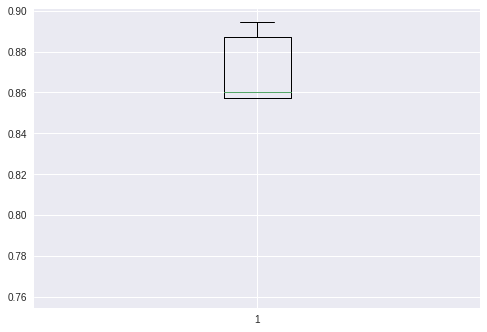

In [61]:
import matplotlib.pyplot as plt
plt.boxplot(ls_acc)
plt.savefig("result_gender")

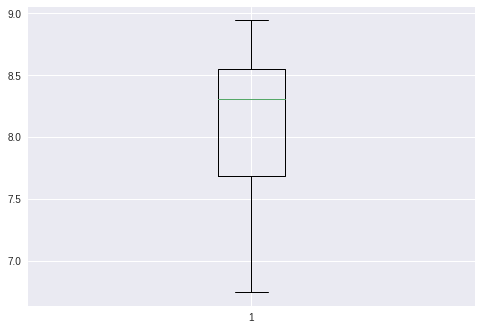

In [62]:
plt.boxplot(ls_mae)
plt.savefig("result_age")

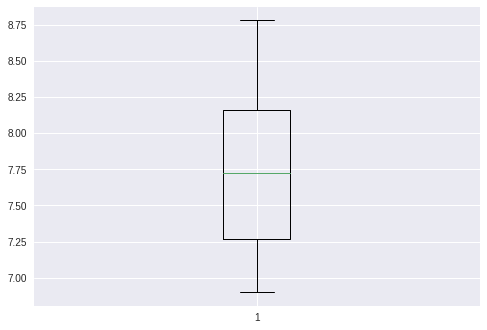

In [63]:
plt.boxplot(ls_mae_2)
plt.savefig("result_age_2")